# TODO

* Demonstrate extra value
* Scaffold exploitation of extra value
* Data semantics: what are nodes, what are edges?
* Squeeze in some graph theory in there
* People, posts... then pages, communities, links co-shared etc
* No FB token sharing, API limits will easily be exceeded (Pedro said)

* Failure mode: other modules of Netvizz

# Another scraping tool: `fb_scraper`

[Designed and programmed](https://github.com/bacilo/facebook-scraper/) by Pedro.

1. Co-reaction: users connect posts with the same reaction
1. User co-interaction: users interact on same posts
1. Extendability

## The steps

1. Become a Facebook developer
1. Set up a Facebook app and API token
1. Download `fb_scraper`
1. Connect `fb_scraper` to this Notebook
1. Set up scrape manager
1. Set up jobs
1. Run jobs
1. Collect output
1. Further analysis

![](https://i.giphy.com/PuWNMebKGIKNG.gif)

## 1. Become a Facebook developer

Apply to be a [Facebook developer](http://developers.facebook.com/).

## 2. Set up a Facebook app and get API token

* Make an app https://developers.facebook.com/apps/
* Get an API token https://developers.facebook.com/tools/explorer/

## 3. Download `fb_scraper`

We download with *git*. Run these in Terminal
    
    git clone https://github.com/bacilo/facebook-scraper.git
    cd facebook-scraper
    git checkout incorporate

## 4. Connect `fb_scraper` to this Notebook

In [1]:
import sys

In [2]:
sys.path.append('../../../facebook-scraper')

In [3]:
import fb_scraper
import fb_scraper.prodcons
import fb_scraper.job

Store the API token from *2.* in a file called `config.ini`, which should contain the following two lines

    [creds]
    access_token = yourTokenHere


## 5. Set up scrape manager

Read the API token into Python

In [4]:
import configparser

In [5]:
config = configparser.ConfigParser()
config.read("config.ini")
creds = config["creds"]

Create a *manager*, a software object which runs the scrapes.

In [6]:
mgr = fb_scraper.prodcons.Manager(dict(creds))

## 6. Set up jobs

The `fb_scraper` can do five kinds of *jobs*:
* FeedJob
* GroupJob
* PageJob
* PostJob
* GraphFromPageJob

Create a `PageJob`

In [7]:
ethospagejob = fb_scraper.job.PageJob(node_id="822254694506527")

Pass it to the manager

In [8]:
mgr.add_job(ethospagejob)

## 7. Run jobs

In [9]:
mgr.start()

(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 0 responses,1 requests,
(Thread-5  - run): About to send 1 requests
(Thread-5  - run): queued 1 responses received
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 0 responses,1 requests,1 responses_queued,
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 1 responses,6 requests,1 responses_queued,97 attachments,100 posts,499 reactions,40 comm,4 sharedposts,
(Thread-8  - run): About to send 5 requests
(Thread-8  - run): queued 3 responses received
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 2 responses,11 requests,4 responses_queued,194 attachments,200 posts,1400 reactions,100 comm,10 sharedposts,
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 3 responses,11 requests,4 responses_queued,194 attachments,200 posts,1400 reactions,100 comm,10 sharedposts,
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527

## 8. Collect output

Find the output in subdirectories of *output*, one for each job. You can open them with Tableau or whatever suits your fancy

In [10]:
def get_job_filepath(job, dataset):
    """Get a dataset file path of job"""
    assert dataset in job.writers, "Job {} does not contain dataset {}".format(job.job_id, dataset)
    return "".join([job.writers[dataset].path, job.writers[dataset].file_name])

In [11]:
import pandas as pd
%matplotlib inline

Let's see what did we acquire.

In [12]:
ethosposts = pd.read_csv(get_job_filepath(ethospagejob, 'posts'),
                         parse_dates=['created_time', 'updated_time'], skipfooter=1, engine="python")

In [13]:
ethosposts.shape

(359, 18)

In [14]:
ethosposts.sample(3)

,id,story,created_time,message,picture,caption,description,from_id,from_name,name,object_id,parent_id,source,status_type,link,type,updated_time,shares_count
38,822254694506527_1333878410010817,NaN,2017-05-22 16:41:15,Melissa Gregg is joining us the next couple of...,https://scontent.xx.fbcdn.net/v/t1.0-0/c35.0.1...,PublicETHOS#20 w/Melissa Gregg,When: 23 May from 13-14:00\nWhere: IT Universi...,822254694506527,ETHOS Lab,PublicETHOS#20 w/Melissa Gregg,2.041214e+14,NaN,NaN,shared_story,https://www.facebook.com/events/204121426772848/,event,2017-05-22 16:41:15,0
272,822254694506527_896703193728343,NaN,2015-10-12 08:30:00,Here are 20 stats that should convince anyone ...,https://external.xx.fbcdn.net/safe_image.php?d...,forbes.com,Big data is not a fad. We are just at the begi...,822254694506527,ETHOS Lab,Big Data: 20 Mind-Boggling Facts Everyone Must...,NaN,NaN,NaN,shared_story,http://www.forbes.com/sites/bernardmarr/2015/0...,link,2015-10-12 08:30:00,0
271,822254694506527_897489013649761,NaN,2015-10-13 08:00:00,Want to know how the Culture Night 2015 went? ...,https://external.xx.fbcdn.net/safe_image.php?d...,ethos.itu.dk,"October 13, 2015 kristineolsen Blog No Comment...",822254694506527,ETHOS Lab,ETHOSLAB at #kulturnatten2015,NaN,NaN,NaN,shared_story,https://ethos.itu.dk/2015/10/13/ethoslab-at-ku...,link,2015-10-13 08:00:00,0


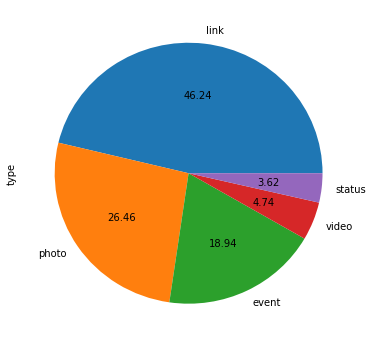

In [15]:
ethosposts.type.value_counts().plot.pie(autopct='%.2f', figsize=(6, 6));

Did we make it so far? Brilliant!

Compare output with Netvizz files. What columns?

## 9.1 Analysis: co-reaction graph

In [16]:
import load_csv
from fb_gexf.fbgexf import GexfManager, CoReactionGraph, UserCoInteractionGraph

In [17]:
print(CoReactionGraph.__doc__)


    The idea is to generate a graph where:

    Nodes: posts
    Edges: there is a connection between two nodes, if a certain user has the
        same reaction to both posts (i.e. 'LOVE's them both or comments both
        for instance)
    


In [18]:
def write_graph(job, gtype):
    """Write out a graph of type CoReactionGraph of UserCoInteractionGraph for job"""
    assert isinstance(job, fb_scraper.job.Job)
    assert gtype in ['CoReactionGraph', 'UserCoInteractionGraph']
    
    gmgr = GexfManager()
    posts = load_csv.load_posts(get_job_filepath(job, 'posts'))
    comments = load_csv.load_comments(get_job_filepath(job, 'comments'))
    reactions = load_csv.load_reactions(get_job_filepath(job, 'reactions'))
    gpath = job.writers['posts'].path

    if gtype == 'CoReactionGraph':
        gmgr.add_method(CoReactionGraph(gpath))
    elif gtype == 'UserCoInteractionGraph':
        gmgr.add_method(UserCoInteractionGraph(gpath))

    gmgr.load(posts, comments, reactions)
    
    gmgr.write()

In [19]:
write_graph(ethospagejob, 'CoReactionGraph')

adding reactions
adding comments
adding posts
performing analysis... this one might take a while for large datasets
processed 1 of 45 comments            
processed 2 of 45 comments            
processed 3 of 45 comments            
processed 4 of 45 comments            
processed 5 of 45 comments            
processed 6 of 45 comments            
processed 7 of 45 comments            
processed 8 of 45 comments            
processed 9 of 45 comments            
processed 10 of 45 comments            
processed 11 of 45 comments            
processed 12 of 45 comments            
processed 13 of 45 comments            
processed 14 of 45 comments            
processed 15 of 45 comments            
processed 16 of 45 comments            
processed 17 of 45 comments            
processed 18 of 45 comments            
processed 19 of 45 comments            
processed 20 of 45 comments            
processed 21 of 45 comments            
processed 22 of 45 comments            
processed 23 

processed 264 of 434 reactions               
processed 265 of 434 reactions               
processed 266 of 434 reactions               
processed 267 of 434 reactions               
processed 268 of 434 reactions               
processed 269 of 434 reactions               
processed 270 of 434 reactions               
processed 271 of 434 reactions               
processed 272 of 434 reactions               
processed 273 of 434 reactions               
processed 274 of 434 reactions               
processed 275 of 434 reactions               
processed 276 of 434 reactions               
processed 277 of 434 reactions               
processed 278 of 434 reactions               
processed 279 of 434 reactions               
processed 280 of 434 reactions               
processed 281 of 434 reactions               
processed 282 of 434 reactions               
processed 283 of 434 reactions               
processed 284 of 434 reactions               
processed 285 of 434 reactions    

## 9.2 Analysis: user co-interaction graph

In [20]:
print(UserCoInteractionGraph.__doc__)

 
    The idea is to generate a graph where:

    Nodes: users that either posted, commented or reacted
    Edges: Two nodes (users) are connected if one has produced content
        (i.e. post or comment), and the other has reacted to that
        (i.e. cmmented or reacted to)
    


In [21]:
write_graph(ethospagejob, 'UserCoInteractionGraph')

adding posts (total: 360)
adding comments (total: 106)
adding reactions (total: 1676)
a test graph directed static  
number of nodes : 441
number of edges : 1782


## Gephi time!

![](https://gephi.org/css/images/illustrations/home_screenshot.jpg)

## Rewind!

More jobs

### 4 + 5 set up manager

If you have restarted your Jupyter, run 4 and 5 above.

In [34]:
mgr = fb_scraper.prodcons.Manager(dict(creds))

### 6. Set up jobs

<div class="alert alert-info">Insert `node_id='someinterestingid'` inside the parentheses below for the jobs</div>

In [ ]:
myjob1 = fb_scraper.job.PageJob() # provide node_id='2931293812093' inside the parentheses
myjob2 = fb_scraper.job.GroupJob() # provide node_id='2931293812093' inside the parentheses
mgr.add_job(myjob1)
mgr.add_job(myjob2)

### 7. Run the jobs

In [ ]:
mgr.start()

...wait for the jobs to finish

### 8 + 9. Run graph analyses and profit

In [ ]:
write_graph(myjob1, 'CoReactionGraph')
write_graph(myjob2, 'UserCoInteractionGraph')

### 4. Collect results

Profit